# *Lecture 8*

# Matrix Algebra and Fits to Data

| |
|:---:|
|Selected Content [From **COMPUTATIONAL PHYSICS**, 3rd Ed, 2015](http://physics.oregonstate.edu/~rubin/Books/CPbook/index.html) <br>RH Landau, MJ Paez, and CC Bordeianu (deceased) <br>Copyrights: <br> [Wiley-VCH, Berlin;](http://www.wiley-vch.de/publish/en/books/ISBN3-527-41315-4/) and [Wiley & Sons, New York](http://www.wiley.com/WileyCDA/WileyTitle/productCd-3527413154.html)<br>  R Landau, Oregon State Unv, <br>MJ Paez, Univ Antioquia,<br> C Bordeianu, Univ Bucharest, 2015.<br> Support by National Science Foundation.|

## Systems of Linear Equations as Matrix Equations

Systems of linear equations occur all the time in physics.
One example is the system of equations stemming from Kirchhoff's Law in a resistor circuit.

<img src="Figures/Resistor_Network.png" width="30%">

In this circuit, Kirchhoff's node and loop laws give a system of 3 equations:
$$
\left(
\begin{array}{c}
I_1 + I_2 + I_3 \\
-2 I_1 + 3 I_2 \\
-3 I_2 + 6 I_3
\end{array}
\right)
= 
\left(
\begin{array}{c}
0 \\
24 \\
0
\end{array}
\right)
$$

Such a system can be written in matrix form $\bf{Ax} = \bf{B}$

$$
\begin{bmatrix}
    1 & 1 & 1 \\
    -2 & 3 & 0 \\
    0 & -3 & 6
\end{bmatrix}
\left[
\begin{array}{c}
I_1 \\
I_2 \\
I_3
\end{array}
\right]
=
\begin{bmatrix}
0 \\
24 \\
0
\end{bmatrix}
$$

A small system of equations like this is relatively straightforward to solve manually:
1. Use first line to solve for $I_1$ in terms of $I_2$ and $I_3$.
2. Substitute this forward (*forward substitution*) into the second line, thereby eliminating $I_1$ in the second equation.
3. Repeat, solving for $I_2$ in terms of $I_3$ and eliminating $I_2$.
4. Solve for $I_3$ and use *backward substitution* in expressions for $I_2$ and subsequently $I_1$.

This is essentially the **Gaussian elimination** algorithm.

## Linear Algebra in Python

As seen in the text, the best way to handle matrices in Python is to create them as NumPy arrays.
The NumPy package converts Python lists to proper arrays with the `array` function.
The NumPy `linalg` package contains all of the linear algebra operations.

List of NumPy operators and their effects.

|*Operator* | *Effect*|*Operator*|*Effect*| 
|- - -|- - - |- - -|- - - | 
|dot(a,b\[,out\]) | Dot product arrays | vdot(a, b) | Dot product | 
|inner(a, b) | Inner product arrays |outer(a, b) | Outer product | 
|tensordot(a, b) | Tensor dot product | einsum( ) |Einstein sum | 
|linalg.matrix_power(M, n) | Matrix to power n | kron(a, b) | Kronecker product| 
|linalg.cholesky(a) | Cholesky decomp |linalg.qr(a)| QR factorization | 
|linalg.svd(a ) | Singular val decomp |linalg.eig(a) | Eigenproblem | 
|linalg.eigh(a) | Hermitian eigen |linalg.eigvals(a)| General eigen |
|linalg.eigvalsh(a) | Hermitian eigenvals |linalg.norm(x) |Matrix norm | 
|linalg.cond(x) | Condition number |linalg.det(a) | Determinant | 
|linalg.slogdet(a) | Sign & log(det) |trace(a) | Diagnol sum | 
|linalg.solve(a, b) | Solve equation |linalg.tensorsolve(a, b) | Solve a x = b | 
|linalg.lstsq(a, b) |Least-squares solve |linalg.inv(a) | Inverse | 
|linalg.pinv(a) | Penrose inverse|linalg.tensorinv(a)| Inverse N-D array |

Other languages, like C++, have similar libraries (`# include <matrix.h>`), all based on the standard [LAPACK libraries](http://www.netlib.org/lapack/).  (The no-nonsense web page lets you know that they are serious people.)

For our small 3x3 matrix, the Python implementation and solution for $\bf x$ looks like this:

In [20]:
import numpy as np

inputs = np.array([1., 1., 1., -2., 3., 0., 0., -3., 6.])
print(inputs)
mylist = [1,2,3]
print(mylist)
inputs2 = np.array([1,2,3])
print(inputs2)
A = inputs.reshape(3,3)
print(A)
print(A.T)
print(np.linalg.det(A))

inputs = np.array([0., 24., 0])
b = inputs.reshape(3,1)
print(b)

x = np.linalg.solve(A,b)
print("x =", x)

[ 1.  1.  1. -2.  3.  0.  0. -3.  6.]
[1, 2, 3]
[1 2 3]
[[ 1.  1.  1.]
 [-2.  3.  0.]
 [ 0. -3.  6.]]
[[ 1. -2.  0.]
 [ 1.  3. -3.]
 [ 1.  0.  6.]]
36.0
[[ 0.]
 [24.]
 [ 0.]]
x = [[-6.]
 [ 4.]
 [ 2.]]


These are the currents: $I_1 = -6$, $I_2 = 4$, and $I_3 = 2$.

## Gaussian Elimination

This method is applied "behind the scenes" of the NumPy `linalg` solver, but it is good to know the algorithm, nonetheless.

The basic operations of Gaussian elimination (Gauss-Jordan method) are:
1. Multiply a particular row in $\bf A$ by a constant
2. Add a multiple of one row to another
3. Interchange two rows

Each one of these can be expressed as a matrix operation:
1. Multiply:
$$\begin{bmatrix}
    1 & 0 & 0 \\
    0 & 1 & 0 \\
    0 & 0 & 2
\end{bmatrix}
$$
2. Add a multiple:
$$
\begin{bmatrix}
    1 & 0 & 0 \\
    0 & 1 & 0 \\
    -1/2 & 0 & 1
\end{bmatrix}
$$
3. Interchange:
$$
\begin{bmatrix}
    0 & 1 & 0 \\
    1 & 0 & 0 \\
    0 & 0 & 1
\end{bmatrix}
$$

These operations continue until we arrive at a **upper triangular matrix** of the form.
The *forward substitution* phase is then complete.

$$
\begin{bmatrix}
    a & b & c \\
    0 & d & e \\
    0 & 0 & f
\end{bmatrix}
\begin{bmatrix}
    x_1  \\
    x_2 \\
    x_3
\end{bmatrix}
=
\begin{bmatrix}
    b_1  \\
    b_2 \\
    b_3 
\end{bmatrix}
$$

Then we solve for $x_3 = b_3/f$ and use that value to solve for $x_2$ in the second equation (second row).  
This is called *back substitution*.
The back substitution continues until we solve for $x_1$.

Let's try to formalize and generalize the Gaussian elimination in terms of the matrix operations.

For a starting matrix equation $\bf{Ax} = \bf{b}$, we write the matrix elements as:

$$
\begin{bmatrix}
    a_{11} & a_{12} & a_{13} & \cdots & a_{1N} \\
    a_{21} & a_{22} & a_{23} & \cdots & a_{2N} \\
    a_{31} & a_{32} & a_{33} & \cdots & a_{3N} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    a_{N1} & a_{N2} & a_{N3} & \cdots & a_{NN}
\end{bmatrix}
\begin{bmatrix}
    x_1  \\
    x_2 \\
    x_3 \\
    \vdots \\
    x_N
\end{bmatrix}
=
\begin{bmatrix}
    b_1  \\
    b_2 \\
    b_3 \\
    \vdots \\
    b_N
\end{bmatrix}
$$

Then, to eliminate $x_1$ in the second line, we multiply by a matrix $\bf{M}_1$, with

$$
\bf{M}_1 = 
\begin{bmatrix}
    1 & 0 & 0 & \cdots & 0 \\
    -a_{21}/a_{11} & 1 & 0 & \cdots & 0 \\
    -a_{31}/a_{11} & 0 & 1 & \cdots & 0 \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    -a_{N1}/a_{11} & 0 & 0 & \cdots & 1
\end{bmatrix}$$

After that single operation,

$$
{\bf M}_1 {\bf A} = 
\begin{bmatrix}
    a_{11} & a_{12} & a_{13} & \cdots & a_{1N} \\
    0 & a_{22}-\frac{a_{21}}{a_{11}}a_{12} & a_{23}-\frac{a_{21}}{a_{11}}a_{13} & \cdots & a_{2N}-\frac{a_{21}}{a_{11}}a_{1N} \\
    0 & a_{32}-\frac{a_{31}}{a_{11}}a_{12} & a_{33}-\frac{a_{31}}{a_{11}}a_{13} & \cdots & a_{3N}-\frac{a_{31}}{a_{11}}a_{1N}\\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    0 & a_{N2}-\frac{a_{N1}}{a_{11}}a_{12} & a_{N3}-\frac{a_{N1}}{a_{11}}a_{13} & \cdots & a_{NN}-\frac{a_{N1}}{a_{11}}a_{1N} \\
\end{bmatrix}
$$

And, at the same time,

$$
{\bf M}_1 {\bf b}=
\begin{bmatrix}
b_1 \\
b_2 - \frac{a_{21}}{a_{11}} b_1 \\
b_3 - \frac{a_{31}}{a_{11}} b_1 \\
\vdots \\
b_N - \frac{a_{N1}}{a_{11}} b_1
\end{bmatrix}
$$

Because we have performed the same operation on both sides of the equation, the new form and the original form are equivalent.
In other words, a solution to this new equation is the same as the solution for the original equation.

After a series of matrix operations $\bf{M}_3 \bf{M}_2 \bf{M}_1 \bf{A}$ (one for each variable), we will have an upper triangular  matrix for $\bf A$.
The process of backward substitution can be thought of in two different ways:
1. Working $i=N-1, N-2, \cdots, 1$, solve for $x_i$ with the formula
$$x_i = \frac{1}{a_{ii}} \left( b_i - \sum_{j=i+1}^N a_{ij} x_j \right)$$
2. Matrix manipulations on both $\bf A$ and $\bf b$ so that the final system looks like 
$$
\begin{bmatrix}
    a_{11} & 0 & 0 & \cdots & 0 \\
    0 & a_{22} & 0 & \cdots & 0 \\
    0 & 0 & a_{33} & \cdots & 0 \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    0 & 0 & 0 & \cdots & a_{NN}
\end{bmatrix}
\begin{bmatrix}
    x_1  \\
    x_2 \\
    x_3 \\
    \vdots \\
    x_N
\end{bmatrix}
=
\begin{bmatrix}
    b_1  \\
    b_2 \\
    b_3 \\
    \vdots \\
    b_N
\end{bmatrix}
$$
From this form, the $a_{ij}$ coefficients can even be absorbed into the $\bf b$ vector:
$$
\begin{bmatrix}
    1 & 0 & 0 & \cdots & 0 \\
    0 & 1 & 0 & \cdots & 0 \\
    0 & 0 & 1 & \cdots & 0 \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    0 & 0 & 0 & \cdots & 1
\end{bmatrix}
\begin{bmatrix}
    x_1  \\
    x_2 \\
    x_3 \\
    \vdots \\
    x_N
\end{bmatrix}
=
\begin{bmatrix}
    b_1 / a_{11}  \\
    b_2 / a_{22} \\
    b_3 / a_{33} \\
    \vdots \\
    b_N / a_{NN}
\end{bmatrix}
$$

From this form, the solutions $x_i$ can be read off directly.

### Pivoting in Gaussian Elimination

The "pivot" in Gaussian elimination is swinging the entire matrix around one line in order to remove elements below its diagonal element.

For example, the first operation in Gaussian elimination is intended to produce $a_{11}=1$, and the second operation makes $a_{21}=0$.

Since this second operation depends on the factor $-a_{21}/a_{11}$, we run into trouble if a diagonal element is 0, or so close to 0 as to cause numerical instability.  
In that case, it would be better to eliminate a different variable first, perhaps by exchanging rows.

For example, consider the system

$$
\begin{bmatrix}
    0 & 1 \\
    1 & 1 
\end{bmatrix}
\begin{bmatrix}
    x_1  \\
    x_2
\end{bmatrix}
=
\begin{bmatrix}
    1  \\
    2
\end{bmatrix}
$$

In this case, $a_{11}=0$, so the first step of elimination ($a_{21}/a_{11}$) can't be completed.

If we switch rows 1 and 2 like this:

$$
\begin{bmatrix}
    1 & 1 \\
    0 & 1 
\end{bmatrix}
\begin{bmatrix}
    x_1  \\
    x_2
\end{bmatrix}
=
\begin{bmatrix}
    2  \\
    1
\end{bmatrix}
$$

then the forward elimination is all done, and we can proceed immediately to the backward substitution.
(Notice that the $\bf x$ vector does not change.)

But there is another wrinkle here.
If $a_{11}$ is not exactly 0 but merely small *compared to the other coefficients in the row*, then the sums suffer from limited precision.
In our simple 3x3 matrix, when
$b_2 - \frac{a_{21}}{a_{11}} b_1 \approx
b_3 - \frac{a_{31}}{a_{11}} b_1$, and the resulting $x$ values will be wrong.

The fix for this problem is to exchange rows so that the row with the largest $a_{1j}$ value (relative to the max weight in the row) lands with that value on the diagonal.  
(It is effectively moved to the top of the matrix, although it may actually be left in place to avoid moving around elements in memory.)

Even if there are no zeros on the diagonal, this procedure still makes best use of the limited machine precision.

Example:

$$
\begin{bmatrix}
    3 & -13 & 9 & 3 \\
    -6 & 4 & 1 & -18 \\
    6 & -2 & 2 & 4 \\
    12 & -8 & 6 & 10
\end{bmatrix}
\begin{bmatrix}
    x_1  \\
    x_2 \\
    x_3 \\
    x_4
\end{bmatrix}
=
\begin{bmatrix}
    -19  \\
    -34 \\
    16 \\
    26
\end{bmatrix}
$$

The largest value of $a_{1j}$ *relative to the maximum value in the row* is 6 at $j=3$.  It's the same (100%) at $j=4$, but we give the tie to the first instance.
Therefore, we eliminate all of the coefficients $a_{1j}$ except $a_{13}$:

$$
\begin{bmatrix}
    0 & -12 & 8 & 1 \\
    0 & 2 & 3 & -14 \\
    6 & -2 & 2 & 4 \\
    0 & -4 & 2 & 2
\end{bmatrix}
\begin{bmatrix}
    x_1  \\
    x_2 \\
    x_3 \\
    x_4
\end{bmatrix}
=
\begin{bmatrix}
    -27 \\
    -18 \\
    16 \\
    -6
\end{bmatrix}
$$

After 2 more repeats of this procedure, we would have an upper diagonal matrix.

## LU Factorization

It turns out that the simple Gaussian elimination we pursued actually factorizes $\bf A$ into two matrices: a *lower unit triangular* matrix $\bf L$ and an *upper triangular* matrix $\bf U$.

$$ {\bf L} = 
\begin{bmatrix}
    1 &  &  &  &  \\
    \ell_{21} & 1 &  &  &  \\
    \ell_{31} & \ell_{32} & 1 &  &  \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    \ell_{N1} & \ell_{N2} & \ell_{N3} & \cdots & 1
\end{bmatrix}
$$

$$ {\bf U} =
\begin{bmatrix}
    u_{11} & u_{12} & u_{13} & \cdots & u_{1N} \\
     & u_{22} & u_{23} & \cdots & u_{2N} \\
     &  & u_{33} & \cdots & u_{3N} \\
     &  &  & \ddots & \vdots \\
     &  &  &  & u_{NN}
\end{bmatrix}
$$

This is the **LU factorization** of $\bf A$:
$${\bf A} = {\bf L}{\bf U}$$

We know that our Gaussian elimination transformed the left-hand side of the equation into an upper triangular matrix during forward elimination, but where does the lower triangular matrix come from?

Hint: that forward elimination created an equivalent equation
$$ {\bf MAx} = {\bf Mb}$$

Start again with the example 4x4 matrix:
$$
\begin{bmatrix}
    6 & -2 & 2 & 4 \\
    12 & -8 & 6 & 10 \\
    3 & -13 & 9 & 3 \\
    -6 & 4 & 1 & -18 \\
\end{bmatrix}
\begin{bmatrix}
    x_1  \\
    x_2 \\
    x_3 \\
    x_4
\end{bmatrix}
=
\begin{bmatrix}
    16 \\
    26 \\
    -19  \\
    -34 \\
\end{bmatrix}
$$

After the forward elimination, we would find

$$ {\bf M A} = {\bf M}_3 {\bf M}_2 {\bf M}_1 {\bf A} = 
\begin{bmatrix}
    6 & -2 & 2 & 4 \\
    0 & -4 & 2 & 2 \\
    0 & 0 & 2 & -5 \\
    0 & 0 & 0 & -3 \\
\end{bmatrix}
= {\bf U}
$$

But what are the forms of the ${\bf M}_1$, etc.?
They are supposed to multiply the relevant coefficient by a negative multiplier so that it can be summed and wiped out.

${\bf M}_1$ is the first step in the Gaussian elimination:

$$ {\bf M}_1= 
\begin{bmatrix}
    1 & 0 & 0 & 0 \\
    -2 & 1 & 0 & 0 \\
    -\frac{1}{2} & 0 & 1 & 0 \\
    1 & 0 & 0 & 1 \\
\end{bmatrix}
$$

This is a unit lower triangular matrix -- we are on the right track to understanding $\bf L$.
In fact, all of those operation matrices are unit lower triangular, since they operate on elements below the diagonal only.

### Factorization

Using linear algebra notation

$$\begin{align}
{\bf M A} &= {\bf U} \\
{\bf M}^{-1} {\bf M A} &= {\bf M}^{-1} {\bf U} \\
{\bf A} &= {\bf M}^{-1} {\bf U} \\
& = {\bf M}_1^{-1} {\bf M}_2^{-1} {\bf M}_3^{-1}{\bf U} \\
{\bf A} &= {\bf L U}
\end{align}
$$

But how do we figure out ${\bf M}_1^{-1}$?
It is as easy as taking the negative of the elimination multipliers below the diagonal!

$$ {\bf M}_1^{-1}= 
\begin{bmatrix}
    1 & 0 & 0 & 0 \\
    2 & 1 & 0 & 0 \\
    \frac{1}{2} & 0 & 1 & 0 \\
    -1 & 0 & 0 & 1 \\
\end{bmatrix}
$$

In [21]:
inputs = np.array([1., 0., 0., 0., -2., 1., 0., 0., 
                -0.5, 0., 1., 0., 1., 0., 0., 1.])
M1 = inputs.reshape(4,4)
print(M1)
print(np.linalg.inv(M1))

[[ 1.   0.   0.   0. ]
 [-2.   1.   0.   0. ]
 [-0.5  0.   1.   0. ]
 [ 1.   0.   0.   1. ]]
[[ 1.  -0.  -0.  -0. ]
 [ 2.   1.   0.   0. ]
 [ 0.5  0.   1.   0. ]
 [-1.   0.   0.   1. ]]


Then we can multiply together the ${\bf M}_n^{-1}$ matrices to get $\bf L$ (see below).

In summary,
* ${\bf A} = {\bf L U}$
* ${\bf L}$ is the matrix of (negative) elimination multipliers that are applied to the original ${\bf A}$ to arrive at ${\bf U}$.  In other words, ${\bf L}^{-1} {\bf A} = {\bf U}$.
* ${\bf U}$ is the final matrix of coefficients after the forward elimination phase is complete

The original problem was to solve 

$$\begin{align}
{\bf A x} &= {\bf b} \\
{\bf L U x} &= {\bf b} \\
{\bf L} ({\bf U x}) &= {\bf b}
\end{align}$$

We have simplified this to two triangular systems:
* ${\bf L z} = {\bf b}$ (forward elimination)
* ${\bf U x} = {\bf z}$ (back substitution)


In [13]:
import scipy
inputs = np.array([6.,-2.,2.,4.,12.,-8.,6.,10.,
                3.,-13.,9.,3.,-6.,4.,1.,-18.])
A = inputs.reshape(4,4)
print(A)

(p,L,U) = scipy.linalg.lu(A)
print(L)
print(U)

[[  6.  -2.   2.   4.]
 [ 12.  -8.   6.  10.]
 [  3. -13.   9.   3.]
 [ -6.   4.   1. -18.]]
[[ 1.          0.          0.          0.        ]
 [ 0.25        1.          0.          0.        ]
 [-0.5        -0.          1.          0.        ]
 [ 0.5        -0.18181818  0.09090909  1.        ]]
[[ 12.          -8.           6.          10.        ]
 [  0.         -11.           7.5          0.5       ]
 [  0.           0.           4.         -13.        ]
 [  0.           0.           0.           0.27272727]]


## Least Squares Fitting

We will assume the chi-square ($\chi^2$) measure of how well a theoretical function $g$
reproduces data.
This measure comes from the maximum likelihood method.

$$
 \chi^{2}  =  \sum_{i=1}^{N_{D}}
\left(\frac{y_{i} - g(x_{i}, a_m)} {\sigma_{i}}\right)^{2}$$

Note that this form includes uncertainties on the measured points, unlike the interpolation forms (cubic splines, etc.) that we discussed last time.

*Least-squares fitting* refers to adjusting the internal parameters $a_m$ in the theory
until a minimum in $\chi^2$ is found, that is, finding a curve
that produces the least value for the summed squares of the deviations
of the data from the function $g(x)$. In general, this is the best fit
possible and the best way to determine the parameters in a theory.

In general, the dependence of $g$ on the internal parameters of the theory) is not necessarily linear.
It is still possible to find parameter values that minimize the $\chi^2$ by using a trial-and-error method (bisection method) in a multi-dimensional space.

### Fits of Linear Functions

If the function being fitted does depend only
*linearly* on the unknown parameters $a_m$, then the condition of
minimum $\chi^2$ leads to a set of simultaneous linear equations
for the $a_m$ that can be solved using numerical matrix
techniques.

For example, if we want to fit $$g(x) = a_1 + a_2x + a_3x^{2}$$
to some experimental measurements
we can still make a linear fit although $x$ is raised
to the second power.  The dependence on the $a_m$ parameters must be linear; that's all.

The $\chi^2$ minimization leads to the
three simultaneous equations for the three $a_m$:

$$\begin{align}
\sum_{i=1}^{N_{D}}  \frac{[y_{i}-g(x_{i})]}{\sigma_{i}^{2}}
\frac{\partial g(x_i)} {\partial a_{1}} & =  0, \quad
\frac{\partial g}{\partial a_1} =1,\\
\sum_{i=1}^{N_{D}}  \frac{[y_{i}-g(x_{i})]}{\sigma_{i}^{2}}
\frac{\partial g(x_i)} {\partial a_{2}} & =  0, \quad \frac{\partial g}{\partial a_2} =
x,\\
\sum_{i=1}^{N_{D}}   \frac{[y_{i}-g(x_{i})]}{\sigma_{i}^{2}}
 \frac{\partial g(x_i)} {\partial a_{3}} & =  0 , \quad \frac{\partial g}{\partial
 a_3}=x^2
\end{align}$$
 
The key here is that all of these equations are linear in $x_1, x_2, \dots, x_N$, so we can write the system of equations in matrix form.

The system of equations:
$$\begin{align}
S a_1 + S_{x}a_2 + S_{xx}a_3 & = S_{y}, \\ S_{x}a_1 + S_{xx} a_2 + S_{xxx} a_3 & =
S_{xy}, \\ S_{xx} a_1 + S_{xxx} a_2 + S_{xxxx} a_3 & = S_{xxy} \end{align}$$

can be converted to matrix form with unknown parameter values (collected in unknown vector $\bf x$):

$$\begin{align}
 &{\bf A}{\bf x}  = {\bf b},  \\
 &{\bf A}  = \left[\begin{array}{lll}
S & S_{x} & S_{xx}\\
 S_{x} & S_{xx} & S_{xxx} \\
 S_{xx} & S_{xxx} & S_{xxxx}\end{array} \right]\!,\quad
 {\bf x} =
\left[\begin{array}{l}
a_1\\ a_2\\ a_3\end{array} \right]\!,\quad {\bf b} =
\left[\begin{array}{l} S_{y}\\ S_{xy}\\ S_{xxy}
\end{array} \right]
\end{align}$$

Then the solution for $\bf x$ depends on solving the equation using numerical methods.
Once we have the parameter values $a_m$, we have the complete function of the fitted curve 
$$g(x) = a_1 + a_2x + a_3x^{2}$$ for any set of $x$ values.


 x vector via inverse
[[ 1002.06558106 -2280.45983096  1269.8244017 ]
 [-1432.41585118  3291.93302443 -1847.84729682]
 [  483.14350806 -1119.31382351   633.40751278]] 

A*inverse(A)
[[  518.00849046 -1018.54883857   501.54034811]
 [-1018.54883857  2146.48279098 -1126.93395241]
 [  501.54034811 -1126.93395241   626.3936043 ]] 

x Matrix via direct
[-8.5698482  11.66987644 -2.76280268] end= 
FitParabola Final Results

y(x) = a0 + a1 x + a2 x^2
a0 =  1.0
a1 =  1.1
a2 =  1.24 

 i   xi     yi    yfit   
 0 1.000  0.520  0.3372256 

 1 1.100  0.800  0.9240246 

 2 1.240  0.700  1.6527132 

 3 1.350  1.800  2.1492771 

 4 1.451  2.900  2.5463350 

 5 1.500  2.900  2.7186604 

 6 1.920  3.600  3.6515188 



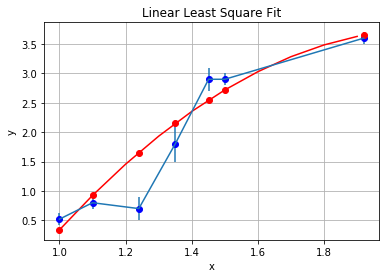

In [22]:
""" From "COMPUTATIONAL PHYSICS", 3rd Ed 
    by RH Landau, MJ Paez, and CC Bordeianu
    Copyright Wiley-VCH Verlag GmbH & Co. KGaA, Berlin;  Copyright R Landau,
    Oregon State Unv, MJ Paez, Univ Antioquia, C Bordeianu, Univ Bucharest, 2015.
    Support by National Science Foundation"""

# Fit.py     Linear least square fit; e.g. of matrix computation arrays
	 

import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
from numpy.linalg import solve

t = np.arange(1.0, 2.0, 0.1)                             # x range curve
x = np.array([1., 1.1, 1.24, 1.35,  1.451, 1.5, 1.92])   # Given x values
y = np.array([0.52, 0.8, 0.7, 1.8, 2.9, 2.9, 3.6])       # Given y values
plt.plot(x, y, 'bo' )                                    # Plot data in blue
sig = np.array([0.1, 0.1, 0.2, 0.3, 0.2, 0.1, 0.1])      # error bar lenghts
plt.errorbar(x,y,sig)                                    # Plot error bars
plt.title('Linear Least Square Fit')                     # Plot figure
plt.xlabel( 'x' )                                        # Label axes
plt.ylabel( 'y' )
plt.grid(True)                                           # plot grid
Nd = 7
A = np.zeros( (3,3), float )                                # Initialize
bvec = np.zeros( (3,1), float )
ss = sx = sxx = sy = sxxx = sxxxx = sxy = sxy = sxxy = 0.

for i in range(0, Nd):                                      
        sig2 = sig[i] * sig[i]
        ss  += 1. / sig2;    sx   += x[i]/sig2;        sy    += y[i]/sig2
        rhl  = x[i] * x[i];  sxx  += rhl/sig2;   sxxy  += rhl * y[i]/sig2
        sxy += x[i]*y[i]/sig2; sxxx +=rhl*x[i]/sig2; sxxxx +=rhl*rhl/sig2
       
A    = np.array([ [ss,sx,sxx], [sx,sxx,sxxx], [sxx,sxxx,sxxxx] ])
bvec = np.array([sy, sxy, sxxy])

xvec = np.multiply(inv(A), bvec)                             # Invert matrix
Itest = np.multiply(A, inv(A))                             # Matrix multiply
print('\n x vector via inverse')                                       
print(xvec, '\n')
print('A*inverse(A)')
print(Itest, '\n')

xvec = solve(A, bvec)                             # Solve via elimination
print('x Matrix via direct') 
print(xvec, 'end= ') 
print('FitParabola Final Results\n') 
print('y(x) = a0 + a1 x + a2 x^2')                          # Desired fit
print('a0 = ', x[0])                  
print('a1 = ', x[1])
print('a2 = ', x[2], '\n')
print(' i   xi     yi    yfit   ')
for i in range(0, Nd):
    s = xvec[0] + xvec[1]*x[i] + xvec[2]*x[i]*x[i]
    print(" %d %5.3f  %5.3f  %8.7f \n"  %(i, x[i], y[i], s))
# red line is the fit, red dots the fits at y[i]
curve  = xvec[0] + xvec[1]*t + xvec[2]*t**2
points = xvec[0] + xvec[1]*x + xvec[2]*x**2
plt.plot(t, curve,'r', x, points, 'ro')
plt.show()

### Fits of Nonlinear Functions Using Linear Approximations

If the theoretical function $g(x, a_m)$ is not a linear function of the parameters $a_m$, then the equations that
result from minimizing $\chi^2$ are not linear equations and so
cannot be solved by the techniques of *linear* algebra (matrix methods).

There are two possibilities for trying to recast these non-linear equations into linear approximations:
* Modify the equations in the form of an expansion about some local (unknown) minimum value
* Use the Newton-Raphson method (internal linear approximation) to solve for the roots of the homogeneous non-linear equations
